# Plot RMS changes 

This notebook will be plotting the differences in RMS due to a synthetic magma body at depth

In [1]:
from pathlib import Path
from mtpy import MTData, MTCollection
from mtpy.modeling.plots.plot_modem_rms import PlotRMS
from mtpy.modeling.modem.data import Data
import numpy as np

In [2]:
dat_path = Path(r"c:\Users\jpeacock\OneDrive - DOI\Geothermal\GreatBasin\modem_inv\gb_01")

In [3]:
test_files = list(dat_path.glob("*test_046*.dat"))

In [4]:
test_files

[WindowsPath('c:/Users/jpeacock/OneDrive - DOI/Geothermal/GreatBasin/modem_inv/gb_01/gb_thumb_test_046_105km.dat'),
 WindowsPath('c:/Users/jpeacock/OneDrive - DOI/Geothermal/GreatBasin/modem_inv/gb_01/gb_thumb_test_046_120km.dat'),
 WindowsPath('c:/Users/jpeacock/OneDrive - DOI/Geothermal/GreatBasin/modem_inv/gb_01/gb_thumb_test_046_150km.dat'),
 WindowsPath('c:/Users/jpeacock/OneDrive - DOI/Geothermal/GreatBasin/modem_inv/gb_01/gb_thumb_test_046_65km.dat'),
 WindowsPath('c:/Users/jpeacock/OneDrive - DOI/Geothermal/GreatBasin/modem_inv/gb_01/gb_thumb_test_046_75km.dat'),
 WindowsPath('c:/Users/jpeacock/OneDrive - DOI/Geothermal/GreatBasin/modem_inv/gb_01/gb_thumb_test_046_85km.dat'),
 WindowsPath('c:/Users/jpeacock/OneDrive - DOI/Geothermal/GreatBasin/modem_inv/gb_01/gb_thumb_test_046_95km.dat')]

In [5]:
md_dict = {}
for fn in test_files:
    print(fn.exists())
    survey = f"test_{fn.stem.split('_')[-1]}"
    md = Data()
    md_dict[survey] = md.read_data_file(fn).dataframe

True
True
True
True
True
True
True


In [6]:
def calculate_rms(data_df, model_df):
    
    for col in ["z_xx", "z_xy", "z_yx", "z_yy", "t_zx", "t_zy"]:
        data_df[f"{col}_model_error"].fillna(1)
        with np.errstate(divide="ignore", invalid="ignore"):
            model_df[f"rms_{col.replace('_', '')}"] = np.abs(
                data_df[col] - model_df[col]
            ) / (np.real(data_df[f"{col}_model_error"]) * np.sqrt(2))
    return model_df

In [7]:
def calculate_rms_change(model_01_df, model_02_df):
    """ 
    Assumes 1 is the original, 2 is the new and returns model 2 as 2 - 1

    In that sense if the value is positive then 2 is larger rms and if
    the value is negative then 2 got smaller.
    """
    for col in ["z_xx", "z_xy", "z_yx", "z_yy", "t_zx", "t_zy"]:
        key = f"rms_{col.replace('_', '')}"
        with np.errstate(divide="ignore", invalid="ignore"):
            model_02_df[key] = 100 * (model_02_df[key] - model_01_df[key]) / model_02_df[key]

    return model_02_df

In [8]:
data_obj = Data()
data_df = data_obj.read_data_file(Path(
    r"c:\Users\jpeacock\OneDrive - DOI\Geothermal\GreatBasin\modem_inv\gb_01\gb_modem_data_z03_t02_edit_12.dat"
)).dataframe
md_dict["data"] = data_df

In [9]:
model_data_obj = Data()
model_data_df = data_obj.read_data_file(
    Path(
        r"c:\Users\jpeacock\OneDrive - DOI\Geothermal\GreatBasin\modem_inv\gb_01\gb_thumb_test_original_response.dat"
    )
)

md_dict["model"] = model_data_df.dataframe

# test_data_obj = Data()
# test_data_df = data_obj.read_data_file(
#     Path(
#         r"c:\Users\jpeacock\OneDrive - DOI\ClearLake\modem_inv\magma_tests\cl_outside_test.dat"
#     )
# )

In [10]:
sorted(md_dict.keys())


['data',
 'model',
 'test_105km',
 'test_120km',
 'test_150km',
 'test_65km',
 'test_75km',
 'test_85km',
 'test_95km']

In [12]:
# base_model_01 = calculate_rms(data_df.dataframe, model_data_df.dataframe)
base_model_01 = calculate_rms(md_dict["data"], md_dict["model"])

In [13]:
base_model_01

,survey,station,latitude,longitude,elevation,datum_epsg,east,north,utm_epsg,model_east,...,pt_ellipticity_model_error,pt_det,pt_det_error,pt_det_model_error,rms_zxx,rms_zxy,rms_zyx,rms_zyy,rms_tzx,rms_tzy
0,,AVG001,39.118,-123.086,-0.0,,0.0,0.0,,-350875.574,...,0.0,0.0,0.0,0.0,2.966015,0.656777,0.610757,1.547977,0.134282,0.238278
1,,AVG001,39.118,-123.086,-0.0,,0.0,0.0,,-350875.574,...,0.0,0.0,0.0,0.0,3.268076,0.173028,0.732715,2.088898,0.315385,0.230918
2,,AVG001,39.118,-123.086,-0.0,,0.0,0.0,,-350875.574,...,0.0,0.0,0.0,0.0,3.685787,0.354652,0.811085,2.496401,0.346806,0.306296
3,,AVG001,39.118,-123.086,-0.0,,0.0,0.0,,-350875.574,...,0.0,0.0,0.0,0.0,4.162288,0.553432,0.888470,2.939648,0.359168,0.423616
4,,AVG001,39.118,-123.086,-0.0,,0.0,0.0,,-350875.574,...,0.0,0.0,0.0,0.0,4.463967,0.819599,0.708134,3.129666,0.388845,0.654246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10487,,sscd93s026,36.287,-118.929,-0.0,,0.0,0.0,,2214.227,...,0.0,0.0,0.0,0.0,6.705627,11.278286,12.509252,3.412760,NaN,NaN
10488,,sscd93s026,36.287,-118.929,-0.0,,0.0,0.0,,2214.227,...,0.0,0.0,0.0,0.0,7.254357,11.600292,12.685434,3.456606,NaN,NaN
10489,,sscd93s026,36.287,-118.929,-0.0,,0.0,0.0,,2214.227,...,0.0,0.0,0.0,0.0,7.066252,12.604004,12.072622,3.650267,NaN,NaN
10490,,sscd93s026,36.287,-118.929,-0.0,,0.0,0.0,,2214.227,...,0.0,0.0,0.0,0.0,6.906886,13.522349,11.615079,4.567578,NaN,NaN


In [14]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.cm import ScalarMappable
import matplotlib.ticker as ticker


# Create a segmented colormap with white band in the middle
def create_segmented_bwr_cmap():
    # Define colors for segments (blue to white to red)
    blues = plt.cm.Blues(np.linspace(0.3, 1, 5))  # 5 shades of blue
    whites = np.array(
        [[1, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1]]
    )  # 2 white segments for -0.1 to 0.1
    reds = plt.cm.Reds(np.linspace(0, 0.7, 5))  # 5 shades of red

    # Combine the colors
    colors_array = np.vstack([blues[::-1], whites, reds])

    # Create nodes for the segments (ensure we have white at -0.1 to 0.1)
    nodes = np.concatenate(
        [
            np.linspace(-1, -0.1, 6),  # 5 blue segments
            np.linspace(-0.1, 0.1, 2),  # white segment
            np.linspace(0.1, 1, 6),  # 5 red segments
        ]
    )

    # Create the colormap
    # cmap = colors.LinearSegmentedColormap.from_list('SegmentedBWR', list(zip(nodes, colors_array)))
    cmap = colors.LinearSegmentedColormap.from_list("SegmentedBWR", list(colors_array))
    return cmap

In [15]:
rms_cmap = create_segmented_bwr_cmap()

In [16]:
# test_df = calculate_rms(data_df.dataframe, test_data_df.dataframe)
test_df = calculate_rms(md_dict["data"], md_dict["test_65km"])
delta_model_df = calculate_rms_change(base_model_01, test_df)

# for key in [k for k in delta_model_df.columns if "rms" in k]:
#     delta_model_df[key] -= .4

25:11:20T10:32:09 | WARNING | line:198 |mtpy.modeling.plots.plot_modem_rms | _plot_rms_map | Could not add base map because HTTPSConnectionPool(host='basemap.nationalmap.gov', port=443): Max retries exceeded with url: /arcgis/rest/services/USGSTopo/MapServer/tile/6/23/9 (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: self-signed certificate in certificate chain (_ssl.c:1016)')))


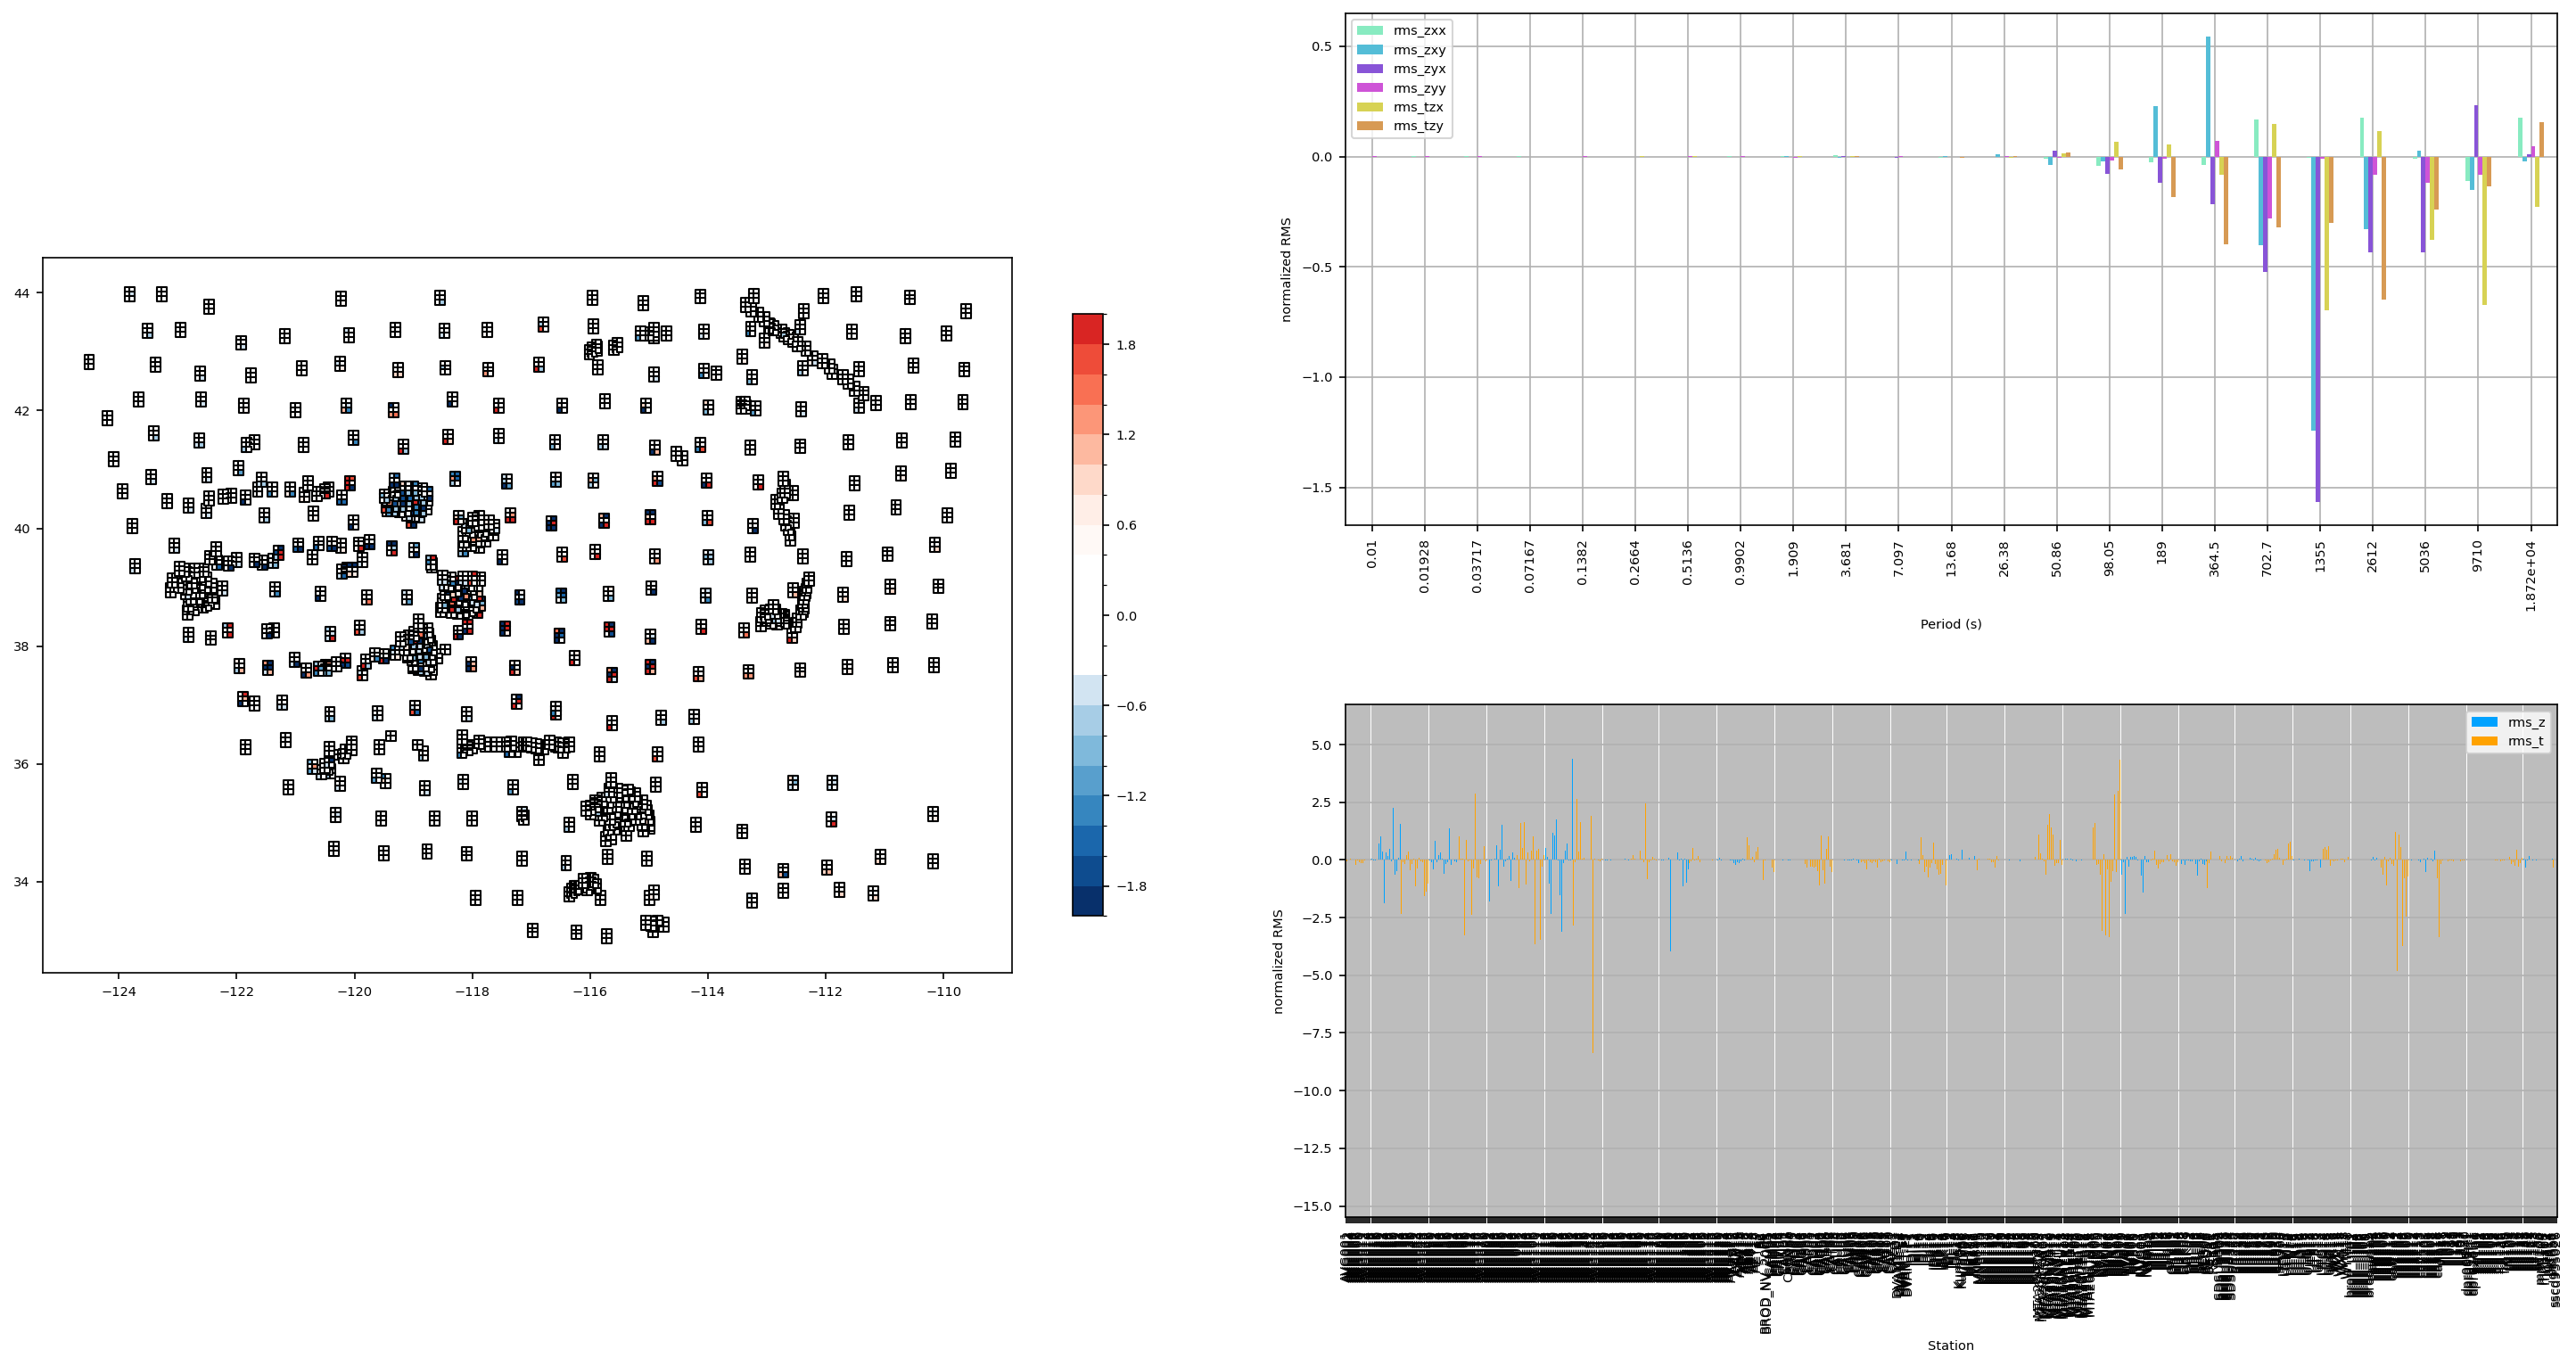

In [17]:
dp = PlotRMS(delta_model_df)
dp.rms_min = -2
dp.rms_max = 2
dp.rms_step = .2
dp.fig_num = 4
dp.fig_size = [20, 10]
#dp.rms_cmap = "mt_rd2wh2bl"
dp.rms_cmap = rms_cmap
dp.plot_station = False
dp.box_size = 10
dp.dx = .15

dp.plot()
#dp.save_plot(h5_path.parent.joinpath(f"{'data'}_vs_{'ouside_purged'}_rms.png"), fig_dpi=300)

In [18]:
for key in md_dict.keys():
    if key in ["data", "model"]:
        continue
    try:
        model_df = calculate_rms(md_dict["data"], md_dict[key])
    except ValueError:
        print(f"Skipping {key}")
        continue
    delta_model_df = calculate_rms_change(base_model_01, model_df)

    dp = PlotRMS(delta_model_df)
    dp.rms_min = -2.6
    dp.rms_max = 2.6
    dp.rms_step = .2
    dp.fig_num = 4
    dp.fig_size = [20, 10]
    dp.rms_cmap = rms_cmap
    dp.plot_station = False
    dp.box_size = 10
    dp.dx = .15

    dp.plot()
    dp.save_plot(
        fn.parent.joinpath(f"{key}_delta_rms.png"), fig_dpi=300
    )

25:11:20T10:34:10 | WARNING | line:198 |mtpy.modeling.plots.plot_modem_rms | _plot_rms_map | Could not add base map because HTTPSConnectionPool(host='basemap.nationalmap.gov', port=443): Max retries exceeded with url: /arcgis/rest/services/USGSTopo/MapServer/tile/6/23/9 (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: self-signed certificate in certificate chain (_ssl.c:1016)')))
25:11:20T10:34:18 | INFO | line:125 |mtpy.imaging.mtplot_tools.base | save_plot | Saved figure to: c:\Users\jpeacock\OneDrive - DOI\Geothermal\GreatBasin\modem_inv\gb_01\test_105km_delta_rms.png
25:11:20T10:34:52 | WARNING | line:198 |mtpy.modeling.plots.plot_modem_rms | _plot_rms_map | Could not add base map because HTTPSConnectionPool(host='basemap.nationalmap.gov', port=443): Max retries exceeded with url: /arcgis/rest/services/USGSTopo/MapServer/tile/6/23/9 (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certifica

In [19]:
for key in md_dict.keys():
    if key in ["data", "model"]:
        continue
    try:
        model_df = calculate_rms(md_dict["data"], md_dict[key])
    except ValueError:
        print(f"Skipping {key}")
        continue
    for base_df, base_id in zip([base_model_01], [40]):
        delta_model_df = calculate_rms_change(base_df, model_df)
        print(f"Mean RMS by component: {key}")
        print(
            f"{delta_model_df[['rms_zxx', 'rms_zyy', 'rms_zxy', 'rms_zyx', 'rms_tzx', 'rms_tzy']].mean()}"
        )
        print("\n")
        print(
            f"Mean RMS: {delta_model_df[['rms_zxx', 'rms_zyy', 'rms_zxy', 'rms_zyx', 'rms_tzx', 'rms_tzy']].mean().mean()}"
        )
        print("=" * 20)

Mean RMS by component: test_105km
rms_zxx    0.001502
rms_zyy   -0.005366
rms_zxy    0.019463
rms_zyx   -0.006368
rms_tzx   -0.030936
rms_tzy   -0.045353
dtype: float64


Mean RMS: -0.011176339223910798
Mean RMS by component: test_120km
rms_zxx    0.005375
rms_zyy   -0.041718
rms_zxy    0.021646
rms_zyx    0.001006
rms_tzx   -0.025358
rms_tzy   -0.021851
dtype: float64


Mean RMS: -0.01014974813980011
Mean RMS by component: test_150km
rms_zxx    0.003476
rms_zyy   -0.018251
rms_zxy    0.015682
rms_zyx    0.001043
rms_tzx   -0.014983
rms_tzy   -0.016360
dtype: float64


Mean RMS: -0.004898732757759848
Mean RMS by component: test_65km
rms_zxx    0.007873
rms_zyy   -0.023071
rms_zxy   -0.049317
rms_zyx   -0.145664
rms_tzx   -0.060597
rms_tzy   -0.107670
dtype: float64


Mean RMS: -0.06307432704335798
Mean RMS by component: test_75km
rms_zxx    0.009805
rms_zyy   -0.016528
rms_zxy   -0.095886
rms_zyx   -0.075626
rms_tzx   -0.062605
rms_tzy   -0.087285
dtype: float64


Mean RMS: -0.05468743

In [44]:
key

'lp_melt'

In [47]:
from mtpy.modeling import StructuredGrid3D

In [53]:
model_path = Path(r"c:\Users\jpeacock\OneDrive - DOI\ClearLake\modem_inv\inv_05_topo")
mfn_list = (
    list(model_path.glob("cl_gpc*.rho"))
    + list(model_path.glob("*cl_li_17km*.rho"))
    + [model_path.joinpath("cl_test_lp_melt.rho")]
)

In [54]:
mfn_list

[WindowsPath('c:/Users/jpeacock/OneDrive - DOI/ClearLake/modem_inv/inv_05_topo/cl_gpc_magma_test_10_ohmm.rho'),
 WindowsPath('c:/Users/jpeacock/OneDrive - DOI/ClearLake/modem_inv/inv_05_topo/cl_gpc_magma_test_20_ohmm.rho'),
 WindowsPath('c:/Users/jpeacock/OneDrive - DOI/ClearLake/modem_inv/inv_05_topo/cl_gpc_magma_test_30_ohmm.rho'),
 WindowsPath('c:/Users/jpeacock/OneDrive - DOI/ClearLake/modem_inv/inv_05_topo/cl_gpc_magma_test_3_ohmm.rho'),
 WindowsPath('c:/Users/jpeacock/OneDrive - DOI/ClearLake/modem_inv/inv_05_topo/cl_li_17km_magma_test_10_ohmm.rho'),
 WindowsPath('c:/Users/jpeacock/OneDrive - DOI/ClearLake/modem_inv/inv_05_topo/cl_li_17km_magma_test_30_ohmm.rho'),
 WindowsPath('c:/Users/jpeacock/OneDrive - DOI/ClearLake/modem_inv/inv_05_topo/cl_li_17km_magma_test_3_ohmm.rho'),
 WindowsPath('c:/Users/jpeacock/OneDrive - DOI/ClearLake/modem_inv/inv_05_topo/cl_test_lp_melt.rho')]

In [55]:
s1 = StructuredGrid3D()
s1.from_modem(r"c:\Users\jpeacock\OneDrive - DOI\ClearLake\modem_inv\inv_05_topo\cl_z03_t02_c02_040.rho")

In [56]:
for mfn in mfn_list:
    s2 = StructuredGrid3D()
    s2.from_modem(mfn)
    s1.res_model *= s2.res_model

s1.res_model = s1.res_model **(1/(len(mfn_list) + 1))
s1.to_modem(model_fn=model_path.joinpath("cl_sm_test_avg.rho"))

25:05:15T16:11:23 | INFO | line:873 |mtpy.modeling.structured_mesh_3d | to_modem | Wrote file to: c:\Users\jpeacock\OneDrive - DOI\ClearLake\modem_inv\inv_05_topo\cl_sm_test_avg.rho
